# 第4章 多层感知机

## 4.1 多层感知机

### 练习4.1.1

计算pReLU激活函数的导数。

**解答：** 

&emsp;&emsp;由$$pReLU(x)= \begin{cases}x & \text { if } x>=0 \\ \alpha x  & \text { if } x<0 \end{cases}$$


&emsp;&emsp;可得
$$ \frac{d}{d x} pReLU(x)= \begin{cases}1 & \text { if } x>=0 \\ \alpha   & \text { if } x<0 \end{cases}$$

&emsp;&emsp;以下使用画图展示：

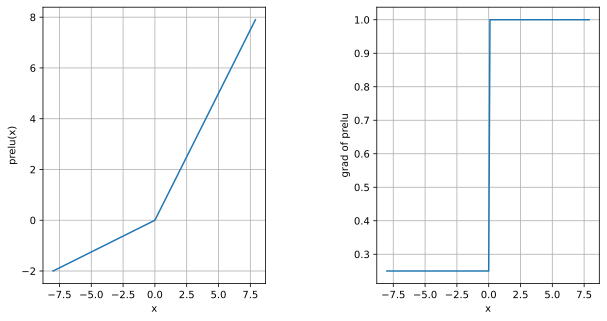

In [10]:
%matplotlib inline
import torch
from d2l import torch as d2l
# import numpy  as np
# import torchvision
# from torch import nn
# from torch.utils import data
# from torchvision import transforms
# import math
# import pandas as pd
#torch.nn.PReLU(num_parameters=1,init=0.25)不用d2l时的PReLU 函数 其中 a 由init设置 同时它是一个可学习的参数
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.prelu(x,weight=torch.tensor(0.25))
d2l.plt.figure(figsize=(10, 5)) 
d2l.plt.subplot(121)
d2l.plot(x.detach(), y.detach(), 'x', 'prelu(x)', figsize=(5, 2.5))
d2l.plt.subplot(122)
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of prelu', figsize=(5, 2.5))
d2l.plt.subplots_adjust(wspace =0.5, hspace =0)

### 练习4.1.2

证明一个仅使用ReLU（或pReLU）的多层感知机构造了一个连续的分段线性函数。

**解答：**

&emsp;&emsp;以下证明参考李宏毅老师课程的[讲义](http://speech.ee.ntu.edu.tw/~tlkagk/courses_MLDS18.html) 和[视频](https://www.youtube.com/watch?v=KKT2VkTdFyc&list=RDCMUC2ggjtuuWvxrHHHiaDH1dlQ&index=2)

&emsp;&emsp;假设我们是要近似一个如下式具有如下式子表示的性质的连续函数 L-Lipschitz函数$f^*$ 

$$
\left\|f^*\left(x_1\right)-f^*\left(x_2\right)\right\| \leq L\left\|x_1-x_2\right\|
$$

&emsp;&emsp;我们不妨假设要近似构造的函数定义域处在为0到1,同时我们定义当一个很小的误差值$\epsilon$，当我们构造的函数,满足如下关系时,我们可以认为我们近似拟合了我们想要的目标函数

$$\max _{0 \leq x \leq 1}\left|f(x)-f^*(x)\right| \leq \varepsilon \Leftrightarrow \int_0^1\left|f(x)-f^*(x)\right|^2 d x \leq \varepsilon$$  

&emsp;&emsp;如图所示对于下图中蓝色的实线函数，只要两个relu神经元就可以拟合。

![relu](../../images/ch4-4-1-2-relu.png)

&emsp;&emsp;所以如下图所示,当考虑要用多个relu（下图绿线,两个绿点之间表示一段用2个relu得到的分段函数）来近似拟合一个连续的定义域在0到1的L-Lipschitz函数(下图实线），我们只要考虑一个适当的分段范围$ l=\displaystyle\frac{\epsilon}{L}$(将在后面给出证明),就可以得到满足我们误差$\epsilon$要求的近似的函数。当我们知道分段范围我们就可以计算我们所需要的分段函数数$ \displaystyle\frac{L}{\epsilon}$以及最终的relu数量$2 \displaystyle\frac{L}{\epsilon}$

![relufit](../../images/ch4-4-1-2-relufit.png)

&emsp;&emsp;关于$ l=\displaystyle\frac{ \varepsilon}{L}$的证明

$$\max _{长度为l的小段范围}\left|f(x)-f^*(x)\right| \leq \varepsilon $$

 $$\max _{长度为l的小段范围}\left|f(x)-f^*(x)\right| \leq\left|f^*(x_1)-f^*(x_2)\right|\leq L \left|x_1-x_2\right| \leq  Ll \leq \varepsilon$$
 &emsp;&emsp;这里的$x_1$和$x_2$是$f^*$在小段范围内最大值点和最小值点

### 练习4.1.3
证明$\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$。

**解答：** 

&emsp;&emsp;已知：$$
\operatorname{tanh}(x)=\frac{1 - \exp(-2x)}{1 + \exp(-2x)}
$$

&emsp;&emsp;故左式：$$\operatorname{tanh}(x) + 1 =\frac{1 - \exp(-2x)}{1 + \exp(-2x)}+1= \frac{2}{1 + \exp(-2x)}$$   

&emsp;&emsp;同时有$$\operatorname{sigmoid}(2x)= \frac{1}{1 + \exp(-2x)}$$ 
&emsp;&emsp;故易证 左式=左式

&emsp;&emsp;以下使用`torch`编程进行验证：

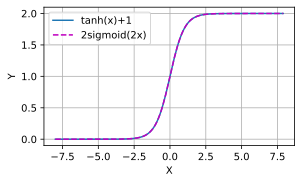

In [16]:
import torch
from d2l import torch as d2l
x = torch.arange(-8.0, 8.0, 0.1)
y1 = torch.tanh(x)+1.0
y2 = 2.0*torch.sigmoid(2.0*x)


d2l.plot(x.detach().numpy(), [y1.detach(), y2.detach()],
         legend=['tanh(x)+1','2sigmoid(2x)'], figsize=(4.5, 2.5))
d2l.plt.xlabel("X");
d2l.plt.ylabel("Y");

### 练习4.1.4

假设我们有一个非线性单元，将它一次应用于一个小批量的数据。这会导致什么样的问题？

**解答：**

&emsp;&emsp;

## 4.2 多层感知机的从零开始实现

### 练习4.2.1

在所有其他参数保持不变的情况下，更改超参数`num_hiddens`的值，并查看此超参数的变化对结果有何影响。确定此超参数的最佳值。

**解答：**  

&emsp;&emsp;256到376范围内num_hiddens得到结果基本一致，所以num_hiddens取256，能保证其他参数不变时得到最佳的结果。

&emsp;&emsp;以下使用torch编程进行实验：

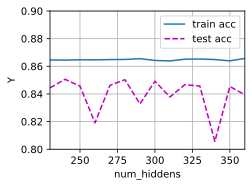

In [22]:
import torch
from d2l import torch as d2l
from torch import nn
train_iter, test_iter = d2l.load_data_fashion_mnist(256, resize=None)

def initweight(num_inputs=784, num_outputs=10, num_hiddens = 256):
    W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
    b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
    W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
    b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
    params = [W1, b1, W2, b2]
    return W1,b1,W2,b2, params
showtrain=0 #showtrain-1 可以展示训练过程的情况
num_inputs=784
num_outputs=10
num_hiddenslist=list(range(230,370,10))
animatornum_hiddens = d2l.Animator(xlabel='num_hiddens',ylabel='Y',xlim=[num_hiddenslist[0],num_hiddenslist[-1]], ylim=[0.8, 0.9],
                        legend=[ 'train acc', 'test acc'])
for num_hiddens in num_hiddenslist:
    num_epochs, lr = 10, 0.1
    loss = nn.CrossEntropyLoss(reduction='none')
    W1,b1,W2,b2, params=initweight(num_inputs=num_inputs, num_outputs=num_outputs, num_hiddens=num_hiddens)
    updater = torch.optim.SGD(params, lr=lr)
    def relu(X):
        a = torch.zeros_like(X)
        return torch.max(X, a)
    def net(X):
        X = X.reshape((-1, num_inputs))
        H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
        return (H@W2 + b2)
    if showtrain==1:
        animator =d2l.Animator(xlabel=f'epoch num_hiddens:{num_hiddens}',ylabel='Y',xlim=[1, num_epochs], ylim=[0.25, 0.9],legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        if showtrain==1:
            animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    print(f'num_hiddens={num_hiddens},train_loss={train_loss}, train_acc={train_acc},test_acc={test_acc}')
    animatornum_hiddens.add(num_hiddens,(train_acc,test_acc))
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc
    


### 练习4.2.2
尝试添加更多的隐藏层，并查看它对结果有何影响。

**解答：**

&emsp;&emsp;在其他参数不变的情况下单纯增加隐藏层数会减少准确率。

&emsp;&emsp;以下使用torch编程进行实验：

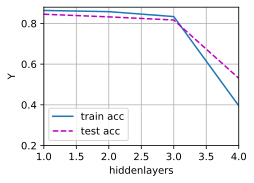

In [63]:
import torch
from d2l import torch as d2l
from torch import nn
train_iter, test_iter = d2l.load_data_fashion_mnist(256, resize=None)

def initweight(num_inputs=784, num_outputs=10, num_hiddens = 256,num_hiddenlayers=1):
    params=[]
    for i in range(num_hiddenlayers):
            a=num_inputs if i==0 else num_hiddens
            b=num_hiddens
            params.append(nn.Parameter(torch.randn(a, b, requires_grad=True) * 0.01))
            params.append(nn.Parameter(torch.zeros(b, requires_grad=True)))
    params.append(nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01))
    params.append(nn.Parameter(torch.zeros(num_outputs, requires_grad=True)))       
    return params
showtrain=0 #showtrain-1 可以展示训练过程的情况
num_inputs=784
num_outputs=10
num_hiddens = 256
num_hiddenlayerslist=list(range(1,5))
animatornum_hiddenlayers = d2l.Animator(xlabel='hiddenlayers',ylabel='Y',xlim=[num_hiddenlayerslist[0],num_hiddenlayerslist[-1]], ylim=[0.2, 0.88],
                        legend=[ 'train acc', 'test acc'])
for num_hiddenlayers in num_hiddenlayerslist:
    num_epochs, lr = 10, 0.1
    loss = nn.CrossEntropyLoss(reduction='none')
    params=initweight(num_inputs=num_inputs, num_outputs=num_outputs, num_hiddens=num_hiddens,num_hiddenlayers=num_hiddenlayers)
    updater = torch.optim.SGD(params, lr=lr)
    def relu(X):
        a = torch.zeros_like(X)
        return torch.max(X, a)
    def net(X):
        X = X.reshape((-1, num_inputs))
        H = relu(X@params[0] + params[1])
        for i in range(2,2*num_hiddenlayers ,2):
            H = relu(H@(params[i]) + params[i+1])  # 这里“@”代表矩阵乘法
        return (H@(params[-2]) + params[-1])
    if showtrain==1:
        animator =d2l.Animator(xlabel=f'epoch num_hiddenlayers:{num_hiddenlayers}',ylabel='Y',xlim=[1, num_epochs], ylim=[0.25, 0.9],legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        if showtrain==1:
            animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    print(f'num_hiddenlayers={num_hiddenlayers},train_loss={train_loss}, train_acc={train_acc},test_acc={test_acc}')
    animatornum_hiddenlayers.add(num_hiddenlayers,(train_acc,test_acc))
    
    

### 练习4.2.3

改变学习速率会如何影响结果？保持模型架构和其他超参数（包括轮数）不变，学习率设置为多少会带来最好的结果？

**解答：** 

&emsp;&emsp;较大的学习速率可以让loss下降更快，在初期更快的训练模型，但也可能造成更新参数值过大 ,导致参数在最优解附近来回跳跃无法收敛或者收敛在错误的值,同时过小的学习率会要求更多的训练轮数以达到收敛。最理想的学习率不是固定值, 而是一个随着训练次数衰减的变化的值, 也就是在训练初期, 学习率比较大, 随着训练的进行, 学习率不断减小, 直到模型收敛.

&emsp;&emsp;以下使用torch编程进行实验：

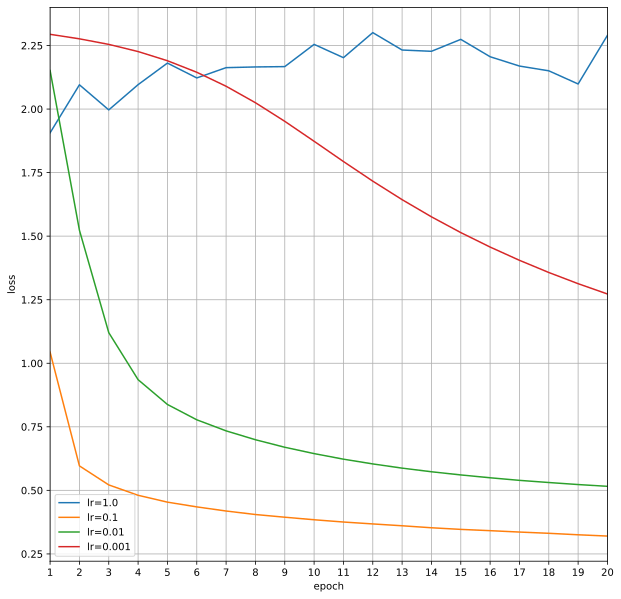

In [274]:
listlr=[1.0,0.1,0.01,0.001]
train_iter, test_iter = d2l.load_data_fashion_mnist(256, resize=None)
num_epochs=20
d2l.plt.figure(figsize=(10, 10))
for lr in listlr:
    num_inputs=784; num_outputs=10; num_hiddens = 256;
    W1,b1,W2,b2, params=initweight()
    updater = torch.optim.SGD(params, lr=lr)
    epoch_loss=[]
    def relu(X):
        a = torch.zeros_like(X)
        return torch.max(X, a)
    def net(X):
        X = X.reshape((-1, num_inputs))
        H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
        return (H@W2 + b2)
    
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        
        
        epoch_loss.append(train_metrics[0])
    train_loss, train_acc = train_metrics
    d2l.plt.plot(range(1,num_epochs+1), epoch_loss,label= (f'lr={lr}') )

d2l.plt.xlim(1,num_epochs)
d2l.plt.xticks(list(range(1,num_epochs+1)))
d2l.plt.xlabel('epoch')
d2l.plt.ylabel('loss')
d2l.plt.grid();
d2l.plt.legend();
d2l.plt.show();

### 练习4.2.4

通过对所有超参数（学习率、轮数、隐藏层数、每层的隐藏单元数）进行联合优化，可以得到的最佳结果是什么？

**解答：** 

&emsp;&emsp;考虑隐藏层数固定为1,学习轮数固定为10,每层的隐藏单元数在（256，128，64 ,32,16）中选取，学习率在（0.0001,0.001,0.01,0.1,1)范围内选取，batch_size(批大小)在（512,256,128,64,32,16）范围内选取的超参数优化。以下展示部分实验数据
| num_epochs | batch_size |  lr  | num_hiddens | test_acc | train_acc | train_loss  |
| ---------- | ---------- | :--: | ----------- | -------- | --------- | ----------- |
| 10         | 256        | 0.1  | 32          | 0.8459   | 0.854367  | 0.41196403  |
| 10         | 128        | 0.1  | 256         | 0.8629   | 0.8808833 | 0.33219405  |
| 10         | 64         | 0.1  | 256         | 0.8769   | 0.89346   | 0.291003041 |
| 10         | 32         | 0.1  | 256         | 0.8865   | 0.9014    | 0.26649176  |
| 10         | 16         | 0.1  | 512         | 0.8824   | 0.90453   | 0.2544131   |




&emsp;&emsp;展示最优结果训练过程和数据

epochs=10,num_hiddens=512,lr=0.1,batch_size=16,train_loss=0.25638708310673636, train_acc=0.9039666666666667,test_acc=0.8697


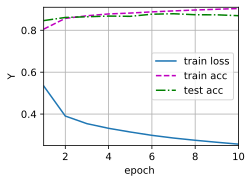

In [11]:
import torch
from d2l import torch as d2l
from torch import nn

def initweight(num_inputs=784, num_outputs=10, num_hiddens = 256):
    W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
    b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
    W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
    b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
    params = [W1, b1, W2, b2]
    return W1,b1,W2,b2, params
num_inputs,num_outputs,num_hiddens=784,10,256
num_epochs, lr,batch_size = 10, 0.1,32
loss = nn.CrossEntropyLoss(reduction='none')
W1,b1,W2,b2, params=initweight(num_inputs=num_inputs, num_outputs=num_outputs, num_hiddens=num_hiddens)
updater = torch.optim.SGD(params, lr=lr)
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
animator = d2l.Animator(xlabel=f'epoch ',ylabel='Y', xlim=[1, num_epochs], ylim=[0.25, 0.91],
                legend=['train loss', 'train acc', 'test acc'])
for epoch in range(num_epochs):
    train_metrics = d2l.train_epoch_ch3(net, train_iter, loss,   updater)
    test_acc = d2l.evaluate_accuracy(net, test_iter)
        
    animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
assert train_loss < 0.5, train_loss
assert train_acc <= 1 and train_acc > 0.7, train_acc
assert test_acc <= 1 and test_acc > 0.7, test_acc
print(f'epochs={num_epochs},num_hiddens={num_hiddens},lr={lr},batch_size={batch_size},train_loss={train_loss}, train_acc={train_acc},test_acc={test_acc}')


&emsp;&emsp;考虑隐藏层数固定为2,并取第二层隐藏单元数为第一层隐藏单元数的一半和10两个数中较大的值，学习轮数固定为10,第一层的隐藏单元数在（256，128，64 ,32,16）中选取，学习率在（0.0001,0.001,0.01,0.1,1)范围内选取，batch_size(批大小)在（512,256,128,64,32,16）范围内选取的超参数优化。以下展示部分实验数据
| num_epochs | batch_size |  lr  | num_hiddens1 | num_hiddens2 | test_acc | train_acc | train_loss |
| ---------- | ---------- | :--: | ------------ | ------------ | -------- | --------- | ---------- |
| 10         | 256        | 0.1  | 512          | 256          | 0.8854   | 0.90515   | 0.24805    |
| 10         | 128        | 0.1  | 256          | 128          | 0.8822   | 0.9017166 | 0.25835    |
| 10         | 64         | 0.1  | 512          | 256          | 0.8811   | 0.90435   | 0.248654   |
| 10         | 32         | 0.1  | 512          | 256          | 0.8837   | 0.906683  | 0.2463282  |
| 10         | 16         | 0.1  | 512          | 256          | 0.8789   | 0.90626   | 0.24752787 |

epochs=10,num_hiddens=512,lr=0.1,batch_size=256,train_loss=0.38585775864919025, train_acc=0.8599333333333333,test_acc=0.838


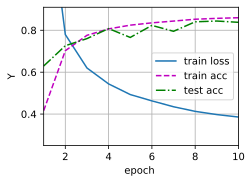

In [12]:
import torch
from d2l import torch as d2l
from torch import nn
def initweight(num_inputs=784, num_outputs=10, num_hiddens = 256):
    num_hiddens2=int(num_hiddens/2) if (num_hiddens/2)>10 else 10
    W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
    b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
    W2 = nn.Parameter(torch.randn(num_hiddens, num_hiddens2, requires_grad=True) * 0.01)
    b2 = nn.Parameter(torch.zeros(num_hiddens2, requires_grad=True))
    W3 = nn.Parameter(torch.randn(num_hiddens2, num_outputs, requires_grad=True) * 0.01)
    b3 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
    params = [W1, b1, W2, b2,W3, b3]
    return W1,b1,W2,b2, W3, b3,params
num_inputs,num_outputs,num_hiddens=784,10,512
num_epochs, lr,batch_size = 10, 0.1,256
loss = nn.CrossEntropyLoss(reduction='none')
W1,b1,W2,b2,W3, b3, params=initweight(num_inputs=num_inputs, num_outputs=num_outputs, num_hiddens=num_hiddens)
updater = torch.optim.SGD(params, lr=lr)
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)# 这里“@”代表矩阵乘法
    X2=H@W2 + b2
    H2 = relu(X2)
    return (H2@W3 + b3)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
animator = d2l.Animator(xlabel=f'epoch ',ylabel='Y', xlim=[1, num_epochs], ylim=[0.25, 0.91],
                legend=['train loss', 'train acc', 'test acc'])
for epoch in range(num_epochs):
    train_metrics = d2l.train_epoch_ch3(net, train_iter, loss,   updater)
    test_acc = d2l.evaluate_accuracy(net, test_iter)
        
    animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
assert train_loss < 0.5, train_loss
assert train_acc <= 1 and train_acc > 0.7, train_acc
assert test_acc <= 1 and test_acc > 0.7, test_acc
print(f'epochs={num_epochs},num_hiddens={num_hiddens},lr={lr},batch_size={batch_size},train_loss={train_loss}, train_acc={train_acc},test_acc={test_acc}')

### 练习4.2.5

描述为什么涉及多个超参数更具挑战性。

**解答：**

 &emsp;&emsp;超参数无法通过常规的优化手段确定，每次调整超参数要依据训练结果导致调整一次需要的成本很大，而过多的超参数将导致更多的参数组合，使得通过训练来确定好最优的超参数很困难。

### 练习4.2.6

如果想要构建多个超参数的搜索方法，请想出一个聪明的策略。

**解答：** 

 &emsp;&emsp;超参数无法通过常规的优化手段确定，每次调整超参数要依据训练结果导致调整一次需要的成本很大，而过多的超参数将导致更多的参数组合，使得通过训练来确定好最优的超参数很困难。根据过往的经验（文献或以前的实践）选定好一组超参数，从调整后计算成本最小的参数入手确定好它的值以后，再去确定计算成本比它大一点的参数，一步确定一个超参数，最后得到所有超参数的值，然后重复之前步骤，直到结果满意为止。

## 4.3 多层感知机的简洁实现

### 练习4.3.1

尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？

**解答：**

 &emsp;&emsp;考虑隐藏层数取512,256,128,64,32,16，以及0.0001,0.001,0.01,0.1,1,10取值范围的学习率，发现隐藏层数取256学习率取0.1效果最好。

&emsp;&emsp;以下使用torch编程进行实验：

NameError: name 'ii' is not defined

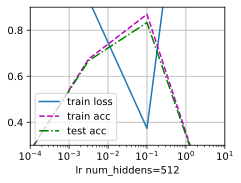

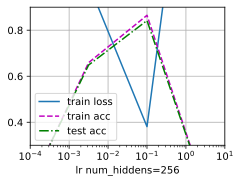

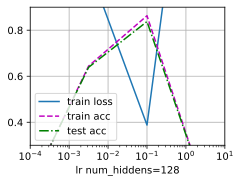

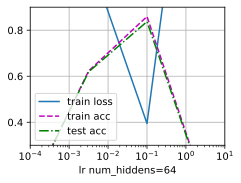

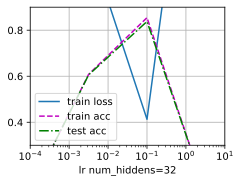

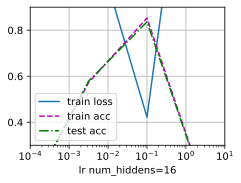

In [8]:
import numpy as np
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

def mynet(num_hiddens):
    net= nn.Sequential(nn.Flatten(),nn.Linear(784, num_hiddens),
                       nn.ReLU(),
                       nn.Linear(num_hiddens, 10))        
def mytrain(lr=0.1,num_hiddens=256,ac='ReLU',show=1,assertshow=1):
    #print(ac)
    net = nn.Sequential(nn.Flatten(),nn.Linear(784, num_hiddens))
    if ac=="Sigmoid":
        net.add_module('Sigmoid',nn.Sigmoid())
    elif ac=="Tanh":
        net.add_module('Tanh',nn.Tanh())
    else:
        net.add_module('ReLU',nn.ReLU())
    net.add_module('Linear',nn.Linear(num_hiddens, 10))             
    net.apply(init_weights);
    batch_size,  num_epochs = 256, 10
    loss = nn.CrossEntropyLoss(reduction='none')
    trainer = torch.optim.SGD(net.parameters(), lr=lr)
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    if show==1:
        animator = d2l.Animator(xlabel=f'epoch {ac} lr ={float(lr):f} num_hiddens={num_hiddens}',ylabel='Y', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss,  trainer)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        if show==1:
            animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    if assertshow==1:
        assert train_loss < 0.5, train_loss
        assert train_acc <= 1 and train_acc > 0.7, train_acc
        assert test_acc <= 1 and test_acc > 0.7, test_acc
    return train_loss,train_acc,test_acc
result=[]
for num_hiddens in [512,256,128,64,32,16]:
    animator2 = d2l.Animator(xlabel=f'lr num_hiddens={num_hiddens}', xlim=[1e-4,10], xscale='log',ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for lr in np.logspace(-4,2,5):
        train_loss,train_acc,test_acc=mytrain(lr=lr,num_hiddens=num_hiddens,show=0,assertshow=0)
        animator2.add(lr, (train_loss,train_acc,test_acc))
        result.append([num_hiddens, lr, test_acc,train_acc,train_loss])
resultmax=sorted(result, key=lambda x: x[2])[-1]
print(f' max batch_size:{ batch_size},num_epochs:{num_epochs},num_hiddens:{resultmax[0]},lr:{resultmax[1]},test_acc:{resultmax[2]},train_acc:{resultmax[3]},train_loss:{resultmax[4]}')

### 练习4.3.2

尝试不同的激活函数，哪个效果最好？

**解答：** 

&emsp;&emsp;ReLU效果最好，Tanh次之，Sigmoid最差训练损失最后超过了0.5。

train_loss: 0.5010108480453491


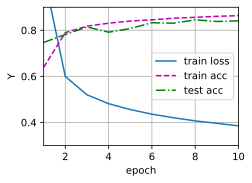

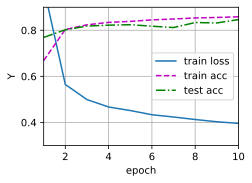

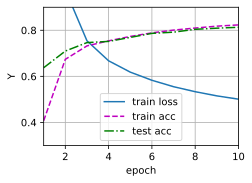

In [71]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
def train_diffactivation_function(ac):
    print(ac)
    net = nn.Sequential(nn.Flatten(),nn.Linear(784, 256))
    if ac=="Sigmoid":
        net.add_module('Sigmoid',nn.Sigmoid())
    elif ac=="Tanh":
        net.add_module('Tanh',nn.Tanh())
    else:
        net.add_module('ReLU',nn.ReLU())
    net.add_module('Linear',nn.Linear(256, 10))             
    net.apply(init_weights);
    batch_size, lr, num_epochs = 256, 0.1, 10
    loss = nn.CrossEntropyLoss(reduction='none')
    trainer = torch.optim.SGD(net.parameters(), lr=lr)
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
    d2l.plt.ylabel("Y");


train_diffactivation_function(ac="ReLU")
train_diffactivation_function(ac="Tanh")
try:
    train_diffactivation_function(ac="Sigmoid")
except Exception as e:
    d2l.plt.ylabel("Y")
    print('Sigmoid train_loss:',e)

### 练习4.3.3

尝试不同的方案来初始化权重，什么方法效果最好？

**解答：** 

&emsp;&emsp;尝试了正态分布初始化权重，单位矩阵初始化权重，均匀分布初始化权重，在这个问题上单位矩阵初始权重的结果表现更好。

&emsp;&emsp;以下使用torch编程进行实验：

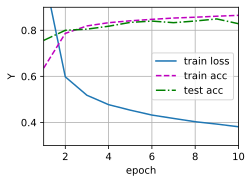

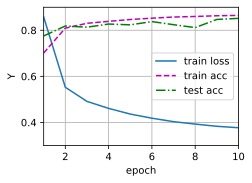

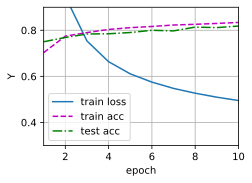

In [72]:
def normal_weights(m):
        if type(m) == nn.Linear:
            nn.init.normal_(m.weight, std=0.01)
            print("normal",m.weight)

def eye_weights(m):
       
        if type(m) == nn.Linear:
            nn.init.eye_(m.weight)
            print("eye",m.weight)

def uniform_weights(m):
       
        if type(m) == nn.Linear:
            nn.init.uniform_(m.weight, a=-1,b=1)
            print("uniform",m.weight)

def train_diffweight(w):
    net = nn.Sequential(nn.Flatten(),nn.Linear(784, 256),nn.ReLU(),nn.Linear(256, 10))             
    if w==0:
        net.apply(normal_weights);
    elif w==1:
        net.apply(eye_weights);
    else:
        net.apply(uniform_weights);
    batch_size, lr, num_epochs = 256, 0.1, 10
    loss = nn.CrossEntropyLoss(reduction='none')
    trainer = torch.optim.SGD(net.parameters(), lr=lr)
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
    d2l.plt.ylabel("Y")

    
train_diffweight(0)
train_diffweight(1)
train_diffweight(2)


## 4.4 模型选择、欠拟合和过拟合

### 练习4.4.1

这个多项式回归问题可以准确地解出吗？提示：使用线性代数。

**解答：** 

&emsp;&emsp;$$L(w)=\frac{1}{2} \sum_{i=1}^N\left(\sum_{j=0}^M w_j x_i^j-y_i\right)^2$$  

$$取 \frac{\partial L(w)}{\partial w_k}=0\Rightarrow\frac{1}{2} \sum_{i=1}^N 2\left(\sum_{j=0}^M w_j x_i^j-y_i\right) \times x_i^k=0 \Rightarrow \sum_{i=1}^N \sum_{j=0}^M w_j x_i^{j+k}=\sum_{i=1}^N x_i^k y_i(k=0,1,2, \cdots, M)\Rightarrow X W=Y$$

$$其中X=\left[\begin{array}{ccccc}
N & \sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2 & \cdots & \sum_{i=1}^N x_i^M \\
\sum_{i=1}^M x_i & \sum_{i=1}^M x_i^2 & \sum_{i=1}^M x_i^3 & \cdots & \sum_{i=1}^M x_i^{N+1} \\
\sum_{i=1}^M x_i^2 & \sum_{i=1}^M x_i^3 & \sum_{i=1}^M x_i^4 & \cdots & \sum_{i=1}^M x_i^{N+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum_{i=1}^M x_i^N & \sum_{i=1}^M x_i^{N+1} & \sum_{i=1}^M x_i^{N+2} & \cdots & \sum_{i=1}^M x_i^{2 N}
\end{array}\right], \quad W=\left[\begin{array}{c}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_M
\end{array}\right], \quad Y=\left[\begin{array}{c}
\sum_{i=1}^N y_i \\
\sum_{i=1}^N\left(x_i^2 y_i\right) \\
\vdots \\
\sum_{i=1}^N\left(x_i^N y_i\right)
\end{array}\right]
$$

$$ W=X^{-1} Y$$

### 练习4.4.2

考虑多项式的模型选择。
1. 绘制训练损失与模型复杂度（多项式的阶数）的关系图。观察到了什么？需要多少阶的多项式才能将训练损失减少到0?
2. 在这种情况下绘制测试的损失图。
3. 生成同样的图，作为数据量的函数。

**解答：** 

&emsp;&emsp;
1.在多项式阶数没有达到4之前阶数增加使得训练损失下降 当阶数超过4时训练误差几乎不变稳定在0.01这个数量级

&emsp;&emsp;
2. 绘制测试的损失图。

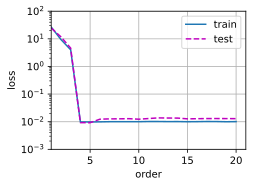

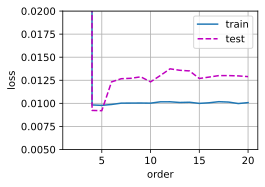

In [228]:
import math
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

def train2(order,num_epochs=400):
    animator = d2l.Animator(xlabel='order', ylabel='loss', yscale='log',
                            xlim=[1, order], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    animator2 = d2l.Animator(xlabel='order', ylabel='loss',
                            xlim=[1, order], ylim=[0.005, 0.02],
                            legend=['train', 'test'])
    for i in range(1,order):
        train_features, test_features, train_labels, test_labels=poly_features[:n_train, :i],poly_features[n_train:, :i],labels[:n_train], labels[n_train:]
        loss = nn.MSELoss(reduction='none')
        input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
        net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
        batch_size = min(10, train_labels.shape[0])
        train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),batch_size)
        test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
        trainer = torch.optim.SGD(net.parameters(), lr=0.01)
        for epoch in range(num_epochs):
            d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        animator.add(i, (d2l.evaluate_loss(net, train_iter, loss),d2l.evaluate_loss(net, test_iter, loss)))
    
        animator2.add(i, (d2l.evaluate_loss(net, train_iter, loss),d2l.evaluate_loss(net, test_iter, loss)))
        
    #print('weight:', net[0].weight.data.numpy())
    #return d2l.evaluate_loss(net, train_iter, loss),d2l.evaluate_loss(net, test_iter, loss)
train2(21,4000)

### 练习4.4.3

如果不对多项式特征$x^i$进行标准化($1/i!$)，会发生什么事情？能用其他方法解决这个问题吗？

**解答：** 

&emsp;&emsp;避免出现较大的梯度值或者损失值。除了这个办法我们也可以让每个特征减去该特征数据的平均值并除于标准差。

### 练习4.4.4

泛化误差可能为零吗？

**解答：**  

&emsp;&emsp;在训练数据足够多的时候泛化误差接近经验误差，实验对于确定可解，且数据没有噪声的问题泛化误差可以为零。

## 4.5 权重衰减

### 练习4.5.1

在本节的估计问题中使用$\lambda$的值进行实验。绘制训练和测试精度关于$\lambda$的函数图。可以观察到什么？

**解答：** 

&emsp;&emsp;随着$\lambda$增加训练精度和测试进度逐渐靠近，但最终没有靠到一起。

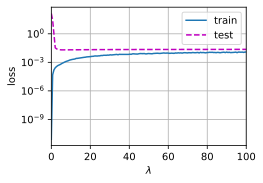

In [419]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)
net = nn.Sequential(nn.Linear(num_inputs, 1))
loss = nn.MSELoss(reduction='none')
def train_wd(wdlist,net,loss,train_data,test_iter,layer=[0],num_epochs=100,lr=0.003):
    
    animator = d2l.Animator(xlabel='$\lambda$', ylabel='loss', yscale='log',
                            xlim=[wdlist[0],wdlist[-1]], legend=['train', 'test'])
    for param in net.parameters():
        param.data.normal_()
    
    
    # 偏置参数没有衰减
    for wd in wdlist:
        for i in layer:
            trainer = torch.optim.SGD([
                {"params":net[i].weight,'weight_decay': wd},
                {"params":net[i].bias}], lr=lr)
   
        for epoch in range(num_epochs):
            for X, y in train_iter:
                trainer.zero_grad()
                l = loss(net(X), y)
                l.mean().backward()
                trainer.step()
            
        animator.add(wd,(d2l.evaluate_loss(net, train_iter, loss),
                              d2l.evaluate_loss(net, test_iter, loss)))
train_wd(np.linspace(0.,100.,150),net,loss,train_iter,test_iter)      

### 练习4.5.2

使用验证集来找到最佳值$\lambda$。它真的是最优值吗？这有关系吗？

**解答：** 

&emsp;&emsp;不一定是最优的解，但绝对不是过拟合的解。

### 练习4.5.3

如果我们使用$\sum_i |w_i|$作为我们选择的惩罚（$L_1$正则化），那么更新方程会是什么样子？

**解答：**

&emsp;&emsp;$$L(\mathbf{w}, b)+\lambda\|\mathbf{w}\|_1$$


$$\mathbf{w} \leftarrow \mathbf{w}-\eta \lambda sign(\mathbf{w})-\frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)}\left(\mathbf{w}^{\top} \mathbf{x}^{(i)}+b-y^{(i)}\right)$$

### 练习4.5.4

我们知道$\|\mathbf{w}\|^2 = \mathbf{w}^\top \mathbf{w}$。能找到类似的矩阵方程吗？（见2.3.10节中的佛罗贝尼乌斯范数）

**解答：** 

&emsp;&emsp;$$\|\mathbf{w}\|_2= \left[\mathbf{w}^\top \mathbf{w}\right]^{1 / 2}$$

### 练习4.5.5

回顾训练误差和泛化误差之间的关系。除了权重衰减、增加训练数据、使用适当复杂度的模型之外，还能想出其他什么方法来处理过拟合？

**解答：**

 &emsp;&emsp;可以在验证误差下降到最低点的时候停止训练，防止过拟合。

### 练习4.5.6

在贝叶斯统计中，我们使用先验和似然的乘积，通过公式$P(w \mid x) \propto P(x \mid w) P(w)$得到后验。如何得到带正则化的$P(w)$？

**解答：** 

&emsp;&emsp;如果考虑最大后验估计（MAP）$$ w=\underset{w}{\arg \max } P(w \mid x)=\underset{w}{\arg \max }(P(x \mid w) P(w))=\underset{w}{\arg \max }log(P(x \mid w) P(w))=\underset{w}{\arg \max }log(P(x \mid w) +log(P(w))$$
如果考虑P(w)为正态分布 


$$
\begin{gathered}
w_i \sim N\left(0, \sigma^2\right) \\
\log P(w)=\log \prod_i \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(w_i-0\right)^2}{2 \sigma^2}} \\
=-\frac{1}{2 \sigma^2} \sum_i w_i^2+C
\end{gathered}
$$
将得到$L_2$正则化的结果,如果考虑P(w)为拉普拉斯分布


$$
\begin{aligned}
w_i & \sim \operatorname{Laplace}(0, b) \\
\log P(w) & =\log \prod_i \frac{1}{2 b} e^{-\frac{\left|w_i-0\right|}{b}} \\
& =-\frac{1}{b} \sum_i\left|w_i\right|+C
\end{aligned}
$$
将得到$L_1$正则化的结果

## 4.6 暂退法

### 练习4.6.1

如果更改第一层和第二层的暂退法概率，会发生什么情况？具体地说，如果交换这两个层，会发生什么情况？设计一个实验来回答这些问题，定量描述该结果，并总结定性的结论。

**解答：** 

&emsp;&emsp;交换两层的暂退法概率会会导致结果变差。提高暂退法概率会也会使得loss更大训练预测的准确度下降，同时调整第一层暂退法概率带来的影响比第二层的大。

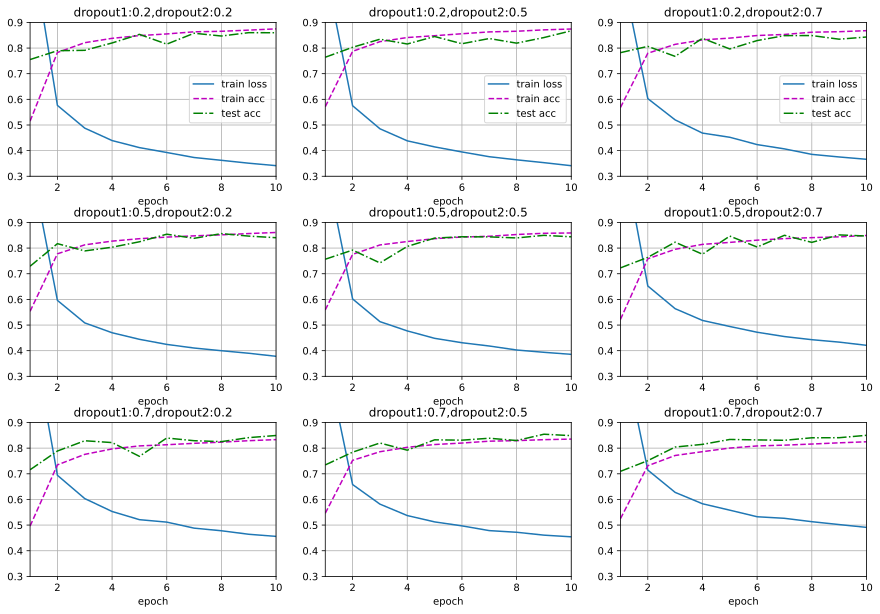

In [340]:
class myAnimator:  
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(4.5, 3.5),wspace=0.5, hspace =0.8):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        
        self.config_axes =lambda axesnx,axesny: d2l.set_axes(self.axes[axesnx,axesny], xlabel, ylabel, xlim, ylim, xscale, yscale, legend) if axesnx==0&axesny==0 else d2l.set_axes(self.axes[axesnx,axesny], xlabel, ylabel, xlim, ylim, xscale, yscale,[])
                    
        d2l.plt.subplots_adjust(wspace =wspace, hspace =hspace)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self,axesnx,axesny, x, y,title=None):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[axesnx,axesny].cla()
        if title:
            self.axes[axesnx,axesny].set_title(title)
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[axesnx,axesny].plot(x, y, fmt)
        self.config_axes(axesnx,axesny)
        d2l.display.display(self.fig)
        d2l.display.clear_output(wait=True)
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
def Net(dropout1=0.5,dropout2=0.2,num_inputs=784, num_outputs=10, num_hiddens1=256, num_hiddens2=256):
    net = nn.Sequential(nn.Flatten(),
                nn.Linear(num_inputs, num_hiddens1),
                nn.ReLU(),
                nn.Dropout(dropout1),
                nn.Linear(num_hiddens1, num_hiddens2),
                nn.ReLU(),
                nn.Dropout(dropout2),
                nn.Linear(num_hiddens2, num_outputs))
    return net
        
def changedropout(dropout1list=[0.5], dropout2list=[0.2], num_epochs=10, lr=0.5,batch_size=256,
                  num_inputs=784, num_outputs=10, num_hiddens1=256, num_hiddens2=256,wd=0,figsize=(15, 10),
                  wspace=0.2, hspace =0.3,xlim=[1, 10], ylim=[0.3, 0.9]):
    ndropout1,ndropout2=len(dropout1list),len(dropout2list)
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    if (ndropout1==1)&(ndropout2==1):
        animator = d2l.Animator(xlabel='epoch', xlim=xlim, ylim=ylim,
                        legend=['train loss', 'train acc', 'test acc'],figsize=figsize)
    else:
        animator = myAnimator(xlabel='epoch', xlim=[1,num_epochs], ylim=ylim,
                        legend=['train loss', 'train acc', 'test acc'],nrows=ndropout1, ncols=ndropout2,figsize=figsize,wspace=wspace, hspace =hspace)
    train_losslist, train_acclist,test_acclist=np.zeros(( ndropout1,ndropout2,num_epochs)),np.zeros((ndropout1,ndropout2,num_epochs)),np.zeros((ndropout1,ndropout2,num_epochs))
    for i in range(ndropout1):
        for j in range(ndropout2):
            dropout1,dropout2=dropout1list[i],dropout2list[j]
            net = Net(dropout1,dropout2)
            net.apply(init_weights);
            loss = nn.CrossEntropyLoss(reduction='none')
            if wd==0:
                trainer=torch.optim.SGD(net.parameters(),lr=lr)
            else:
                trainer=torch.optim.SGD(net.parameters(),weight_decay=wd,lr=lr)#偏置参数也衰减
            
            for epoch in range(num_epochs):
                train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, trainer)
                test_acc = d2l.evaluate_accuracy(net, test_iter)
                train_losslist[i,j,epoch],train_acclist[i,j,epoch],test_acclist[i,j,epoch]=train_metrics[0],train_metrics[1],test_acc
                if ndropout1==1&ndropout2==1:
                    animator.add(epoch + 1, train_metrics + (test_acc,))
                else:
                    animator.add(i,j,epoch + 1, train_metrics + (test_acc,),title=f"dropout1:{dropout1},dropout2:{dropout2}")
            #animator.axes[i,j].set_title(f"dropout1:{dropout1},dropout2:{dropout2}")    
            animator.X,animator.Y=None, None
            train_loss, train_acc = train_metrics
#            assert train_loss < 0.5, train_loss
#            assert train_acc <= 1 and train_acc > 0.7, train_acc
#            assert test_acc <= 1 and test_acc > 0.7, test_acc
    return  train_losslist,train_acclist,test_acclist
dropout1list,dropout2list=[0.2,0.5,0.7],[0.2,0.5,0.7]
train_losslist,train_acclist,test_acclist=changedropout(dropout1list=[0.2,0.5,0.7],dropout2list=[0.2,0.5,0.7])


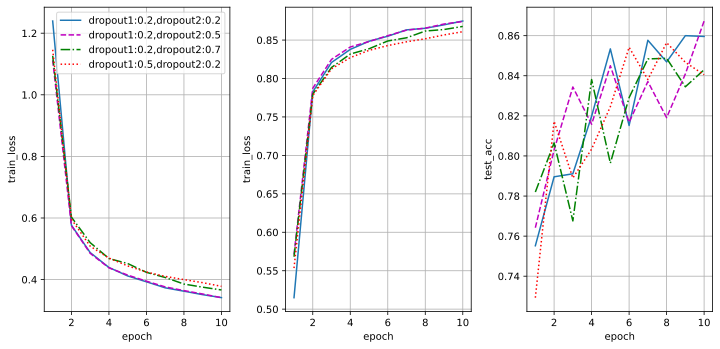

In [342]:
d2l.plt.figure(figsize=(12, 5.5))
d2l.plt.subplot(131)
d2l.plot(list(range(1,11)),np.vstack([train_losslist[i,:,:] for i in range(3)]),'epoch', 'train_loss',
                     legend=[f'dropout1:{dropout1},dropout2:{dropout2}' for dropout1 in dropout1list for dropout2 in dropout1list])
d2l.plt.subplot(132)
d2l.plot(list(range(1,11)),np.vstack([train_acclist[i,:,:] for i in range(3)]),'epoch', 'train_acc')
                     #legend=[f'dropout1:{dropout1},dropout2:{dropout2}' for dropout1 in dropout1list for dropout2 in dropout1list],figsize=(10, 8))
d2l.plt.subplot(133)
d2l.plot(list(range(1,11)),np.vstack([test_acclist[i,:,:] for i in range(3)]),'epoch', 'test_acc')
                     #legend=[f'dropout1:{dropout1},dropout2:{dropout2}' for dropout1 in dropout1list for dropout2 in dropout1list],figsize=(10, 8))
d2l.plt.subplots_adjust(wspace =0.3, hspace =0)

### 练习4.6.2

增加训练轮数，并将使用暂退法和不使用暂退法时获得的结果进行比较。

**解答：** 

 &emsp;&emsp;没使用dropout会出现loss值突然上升的情况 ，使用dropout的结果这种情况则会消失。

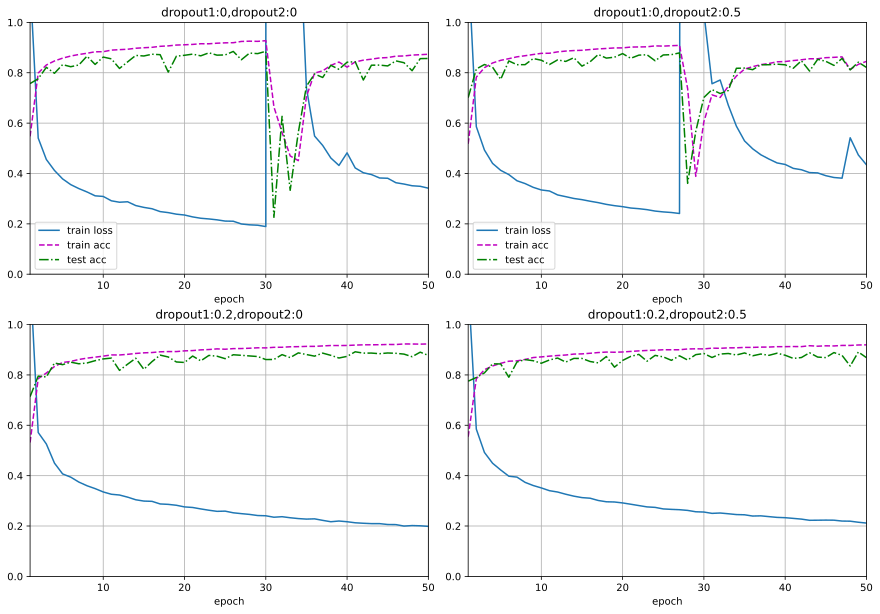

In [346]:
num_epochs=50
dropout1list,dropout2list=[0,0.2],[0,0.5] 
train_losslist,train_acclist,test_acclist=changedropout(dropout1list=dropout1list,dropout2list=dropout2list,num_epochs=num_epochs,wspace=0.1, hspace =0.2,ylim=[0,1])

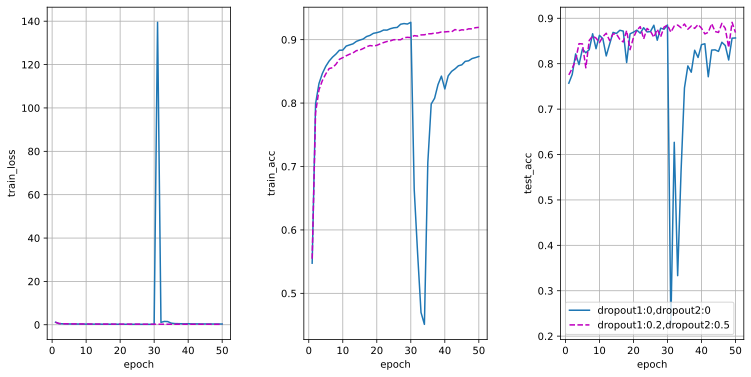

In [347]:
d2l.plt.figure(figsize=(12.5, 6)) 
d2l.plt.subplot(131)
d2l.plot(list(range(1,num_epochs+1)),np.vstack((train_losslist[0,0,:],train_losslist[1,1,:])),'epoch', 'train_loss')
d2l.plt.subplot(132)
d2l.plot(list(range(1,num_epochs+1)),np.vstack((train_acclist[0,0,:],train_acclist[1,1,:])),'epoch', 'train_acc')
d2l.plt.subplot(133)
d2l.plot(list(range(1,num_epochs+1)),np.vstack((test_acclist[0,0,:],test_acclist[1,1,:])),'epoch', 'test_acc',
                     legend=['dropout1:0,dropout2:0','dropout1:0.2,dropout2:0.5'])
d2l.plt.subplots_adjust(wspace =0.4, hspace =0)

### 练习4.6.3

当使用或不使用暂退法时，每个隐藏层中激活值的方差是多少？绘制一个曲线图，以显示这两个模型的每个隐藏层中激活值的方差是如何随时间变化的。

**解答：**

&emsp;&emsp; 使用暂退法,每个中间活性值$h$以*暂退概率*$p$由随机变量$h'$替换,如下所示：

$$
\begin{aligned}
h' =
\begin{cases}
    0 & \text{ 概率为 } p \\
    \frac{h}{1-p} & \text{ 其他情况}
\end{cases}
\end{aligned}
$$

&emsp;&emsp;其期望值保持不变，即$E[h'] = h$。它的方差 $D(h')=E\left((h'-E(h'))^2\right)=E\left(h'^2\right)-E^2\left(h'\right)=\displaystyle \frac{h^2}{\left(1-p\right)}-h$

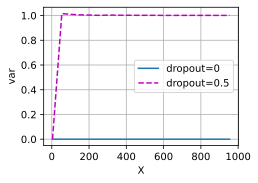

In [91]:
import torch
from d2l import torch as d2l
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)
# X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
dropout0,dropout0d5,var_dropout0d5,var_dropout0=dropout_layer(torch.ones(1,dtype = torch.float32), 0),dropout_layer(torch.ones(1,dtype = torch.float32), 0.5),torch.empty(1),torch.empty(1)
#torch.var(dropout_layer(torch.ones(1,dtype = torch.float32), 0.5))
for _ in range(1000):
    dropout0d5=torch.cat([dropout0d5,dropout_layer(torch.ones(1,dtype = torch.float32), 0.5)])
    dropout0=torch.cat([dropout0,dropout_layer(torch.ones(1,dtype = torch.float32), 0)])
    
    var_dropout0d5=torch.cat([var_dropout0d5,torch.var(dropout0d5).reshape(1)])
    var_dropout0=torch.cat([var_dropout0,torch.var(dropout0).reshape(1)])

d2l.plot(torch.arange(2,1003)[2:-1:50], [var_dropout0.detach()[2:-1:50],var_dropout0d5.detach()[2:-1:50]],
         legend=['dropout=0','dropout=0.5'])
d2l.plt.xlabel("X");
d2l.plt.ylabel("var");

#, figsize=(4.5, 2.5)

### 练习4.6.4

为什么在测试时通常不使用暂退法？

**解答：** 

&emsp;&emsp;训练时使用暂退法是为了防止模型过拟合，提高网络泛化能力，而测试时我们希望可以用上所有的参数，减少参数反而会影响网络稳定性。

### 练习4.6.5

以本节中的模型为例，比较使用暂退法和权重衰减的效果。如果同时使用暂退法和权重衰减，会发生什么情况？结果是累加的吗？收益是否减少（或者说更糟）？它们互相抵消了吗？

**解答：** 

&emsp;&emsp;使用权重衰减似乎会令本节模型结果变差？

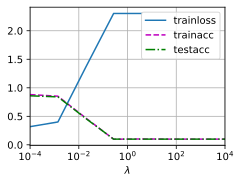

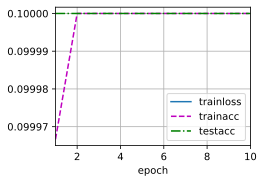

In [352]:
num_epochs,lr,batch_size=10,0.5,256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
wdlist=np.logspace(-4,4,8)
animator = d2l.Animator(xlabel='$\lambda$',
                            xlim=[1e-4,1e4], xscale='log', legend=['trainloss','trainacc', 'testacc'])
animatortrain = d2l.Animator(xlabel='epoch',
                            xlim=[1,num_epochs], legend=['trainloss','trainacc', 'testacc'])
for wd in wdlist:
    
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    
    netwd=Net(dropout1=0,dropout2=0)
    netwd.apply(init_weights);
    loss = nn.CrossEntropyLoss(reduction='none')
    trainer = torch.optim.SGD(netwd.parameters(),weight_decay = wd, lr=lr)
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(netwd, train_iter, loss, trainer)
        test_acc = d2l.evaluate_accuracy(netwd, test_iter)
        animatortrain.add(epoch+1, train_metrics + (test_acc,))
    animatortrain.X,animatortrain.Y=None,None
    animator.add(wd, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
#     assert train_loss < 0.5, train_loss 
#     assert train_acc <= 1 and train_acc > 0.7, train_acc
#     assert test_acc <= 1 and test_acc > 0.7, test_acc

train_loss with dorpout :0.34117251790364583,train_loss with weightdeacy :0.35309267908732095,train_loss with dorpout and weightdeacy :0.7753129530588786
train_acc with dorpout :0.8738833333333333,train_acc with weightdeacy :0.8705333333333334,train_acc with dorpout and weightdeacy :0.7097333333333333
test_acc with dorpout :0.8695,test_acc with weightdeacy :0.8481,test_acc with dorpout and weightdeacy :0.6304


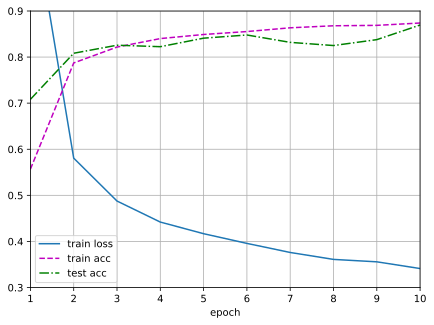

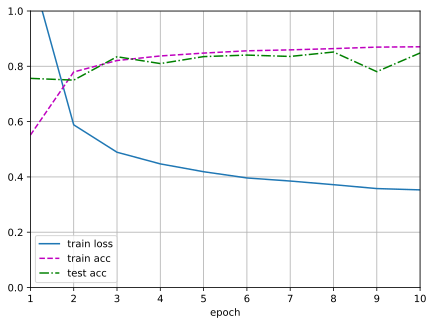

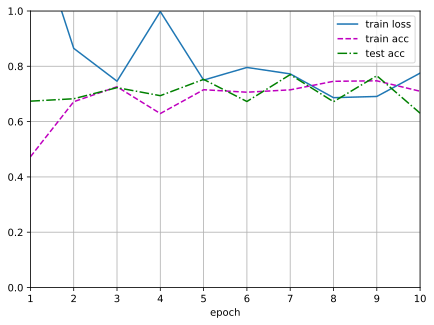

In [370]:
train_losslist1,train_acclist1,test_acclist1=changedropout(dropout1list=[0.2],dropout2list=[0.5],figsize=(7, 5))
train_losslist2,train_acclist2,test_acclist2=changedropout(dropout1list=[0.2],dropout2list=[0.5],wd=1e-4,ylim=[0,1],figsize=(7, 5))
train_losslist3,train_acclist3,test_acclist3=changedropout(dropout1list=[0],dropout2list=[0],wd=1e-2,ylim=[0,1],figsize=(7, 5))
print(f'train_loss with dorpout :{train_losslist1[-1][-1][-1]},train_loss with weightdeacy :{train_losslist2[-1][-1][-1]},train_loss with dorpout and weightdeacy :{train_losslist3[-1][-1][-1]}')
print(f'train_acc with dorpout :{train_acclist1[-1][-1][-1]},train_acc with weightdeacy :{train_acclist2[-1][-1][-1]},train_acc with dorpout and weightdeacy :{train_acclist3[-1][-1][-1]}')
print(f'test_acc with dorpout :{test_acclist1[-1][-1][-1]},test_acc with weightdeacy :{test_acclist2[-1][-1][-1]},test_acc with dorpout and weightdeacy :{test_acclist3[-1][-1][-1]}')

### 练习4.6.7

如果我们将暂退法应用到权重矩阵的各个权重，而不是激活值，会发生什么？

**解答：** 

&emsp;&emsp;把dropout放在激活层之前，可能导致dropout失去作用，因为很多激活函数对于0的值不为零，所以即使有一些神经元被取为0值，我们仍然有梯度更新他们的参数。

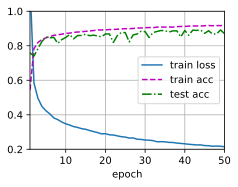

In [489]:
dropout1=0.2;dropout2=0.5;num_inputs=784; num_outputs=10; num_hiddens1=256; num_hiddens2=256;num_epochs=20;
net = nn.Sequential(nn.Flatten(),
                nn.Linear(num_inputs, num_hiddens1),
                nn.Dropout(dropout1),
                nn.ReLU(),
                nn.Linear(num_hiddens1, num_hiddens2),
                nn.Dropout(dropout2),
                nn.ReLU(),
                nn.Linear(num_hiddens2, num_outputs))
        

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
animator = d2l.Animator(xlabel='epoch', xlim=[1,num_epochs], ylim=[0.2, 1.0],
                        legend=['train loss', 'train acc', 'test acc'])
    

net.apply(init_weights);
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)
            
for epoch in range(num_epochs):
    train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, trainer)
    test_acc = d2l.evaluate_accuracy(net, test_iter)
    animator.add(epoch + 1, train_metrics + (test_acc,))
            #animator.axes[i,j].set_title(f"dropout1:{dropout1},dropout2:{dropout2}")    
           
train_loss, train_acc = train_metrics
#            assert train_loss < 0.5, train_loss
#            assert train_acc <= 1 and train_acc > 0.7, train_acc
#            assert test_acc <= 1 and test_acc > 0.7, test_acc



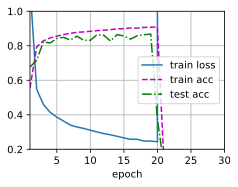

In [505]:
dropout1=0.2;dropout2=0.5;num_inputs=784; num_outputs=10; num_hiddens1=256; num_hiddens2=256;num_epochs=30;
net = nn.Sequential(nn.Flatten(),
                nn.Linear(num_inputs, num_hiddens1),
                #nn.Dropout(dropout1),
                nn.ReLU(),
                nn.Linear(num_hiddens1, num_hiddens2),
                #nn.Dropout(dropout2),
                nn.ReLU(),
                nn.Linear(num_hiddens2, num_outputs))
        

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
animator = d2l.Animator(xlabel='epoch', xlim=[1,num_epochs], ylim=[0.2, 1.0],
                        legend=['train loss', 'train acc', 'test acc'])
    

net.apply(init_weights);
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)
            
for epoch in range(num_epochs):
    train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, trainer)
    test_acc = d2l.evaluate_accuracy(net, test_iter)
    animator.add(epoch + 1, train_metrics + (test_acc,))
            #animator.axes[i,j].set_title(f"dropout1:{dropout1},dropout2:{dropout2}")    
           
train_loss, train_acc = train_metrics

### 练习4.6.8

开发另一种用于在每一层注入随机噪声的技术，该技术不同于标准的暂退法技术。尝试开发一种在Fashion-MNIST数据集（对于固定架构）上性能优于暂退法的方法。

**解答：**

&emsp;&emsp;

## 4.7 前向传播、反向传播和计算图

### 练习4.7.1 

假设一些标量函数$\mathbf{X}$的输入$\mathbf{X}$是$n \times m$矩阵。$f$相对于$\mathbf{X}$的梯度维数是多少？

**解答：** 

&emsp;&emsp;$n \times m$ 维

### 练习4.7.2

向本节中描述的模型的隐藏层添加偏置项（不需要在正则化项中包含偏置项）。

1. 画出相应的计算图。
2. 推导正向和反向传播方程。

**解答：**

&emsp;&emsp;
1. ![计算图](../../images/ch04-7-2-Computational-Graph-of-Forward-Propagation.png)


&emsp;&emsp;
2. 正向传播方程 只要我们沿着计算图逐项计算就可以得到

$$
\mathbf{z^\prime}=\mathbf{W}^{(1)} \mathbf{x},\mathbf{z}=\mathbf{b}^{(1)}+ \mathbf{z^\prime},\mathbf{h}=\mathbf{\phi} (\mathbf{z}),\mathbf{o^\prime}=\mathbf{W}^{(2)} \mathbf{h},\mathbf{o}=\mathbf{b}^{(2)}+ \mathbf{o^\prime},L=l(\mathbf{o}, y),s=\frac{\lambda}{2}\left(\left\|\mathbf{W}^{(1)}\right\|_F^2+\left\|\mathbf{W}^{(2)}\right\|_F^2\right),J=L+s
$$


&emsp;&emsp;&emsp;&emsp;反向传播方程

&emsp;&emsp;&emsp;&emsp;反向传播的目的是计算梯度$\displaystyle\frac{\partial J}{\partial \mathbf{W}^{(1)}} \text { , }\displaystyle \frac{\partial J}{\partial \mathbf{W}^{(2)}}\text{,} \displaystyle\frac{\partial J}{\partial \mathbf{b}^{(1)}} \text { , }\displaystyle \frac{\partial J}{\partial \mathbf{b}^{(2)}}$

&emsp;&emsp;&emsp;&emsp;前两个式子和本章文中相同
$$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.
$$

$$
\frac{\partial J}{\partial \mathbf{W}^{(2)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)
= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.
$$
&emsp;&emsp;&emsp;&emsp;可以参考原文

>第一步是计算目标函数$J=L+s$相对于损失项$L$和正则项$s$的梯度。
>
>$$\frac{\partial J}{\partial L} = 1 \; \text{and} \; \frac{\partial J}{\partial s} = 1.$$
>
>接下来，我们根据链式法则计算目标函数关于输出层变量$\mathbf{o}$的梯度：
>
>$$
\frac{\partial J}{\partial \mathbf{o}}
= \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right)
= \frac{\partial L}{\partial \mathbf{o}}
\in \mathbb{R}^q.
$$
>
>接下来，我们计算正则化项相对于两个参数的梯度：
>
>$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}
\; \text{and} \;
\frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$
>
>现在我们可以计算最接近输出层的模型参数的梯度
>$\partial J/\partial \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$。
>使用链式法则得出：
>
>$$\frac{\partial J}{\partial \mathbf{W}^{(2)}}= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.$$
>
>为了获得关于$\mathbf{W}^{(1)}$的梯度，我们需要继续沿着输出层到隐藏层反向传播。
>关于隐藏层输出的梯度$\partial J/\partial \mathbf{h} \in \mathbb{R}^h$由下式给出：
>
>$$
\frac{\partial J}{\partial \mathbf{h}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right)
= {\mathbf{W}^{(2)}}^\top \frac{\partial J}{\partial \mathbf{o}}.
$$
>
>由于激活函数$\phi$是按元素计算的，
>计算中间变量$\mathbf{z}$的梯度$\partial J/\partial \mathbf{z} \in \mathbb{R}^h$
>需要使用按元素乘法运算符，我们用$\odot$表示：
>
>$$
\frac{\partial J}{\partial \mathbf{z}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right)
= \frac{\partial J}{\partial \mathbf{h}} \odot \phi'\left(\mathbf{z}\right).
$$
>
>最后，我们可以得到最接近输入层的模型参数的梯度
>$\partial J/\partial \mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$。
>根据链式法则，我们得到：
>
>$$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.
$$

&emsp;&emsp;&emsp;&emsp;根据链式子法则，后面两个式子的结果为：
$$
\frac{\partial J}{\partial \mathbf{b}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{b}^{(2)}}\right) 
= \frac{\partial J}{\partial \mathbf{h}}.
$$

$$
\frac{\partial J}{\partial \mathbf{b}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{b}^{(2)}}\right) 
= \frac{\partial J}{\partial \mathbf{o}}.
$$


### 练习4.7.3

计算本节所描述的模型，用于训练和预测的内存空间。

**解答：**

&emsp;&emsp;训练需要存储的参数：$x,z,h,o,y,W^{(1)},W^{(2)}, \displaystyle\frac{\partial J}{\partial \mathbf{W}^{(1)}} ，\displaystyle \frac{\partial J}{\partial \mathbf{W}^{(2)}}$

&emsp;&emsp;假设输入数据为n维$W^{(1)}$和$\displaystyle\frac{\partial J}{\partial \mathbf{W}^{(1)}}$为$𝑛×𝑚$维,则$z$和$h$为$m$维。$W^{(2)}$和$\displaystyle\frac{\partial J}{\partial \mathbf{W}^{(2)}}$为$m×k$维,则$o$和有为$k$维 。 网络参数为浮点小数，通常用float单精度表示，单精度float占32位/4个字节。那么占用总字节数为$(n+n×m×2+2×m+m×k×2+k×2)×4B$

&emsp;&emsp;预测需要存储的参数：$x,z,h,o,y,W^{(1)},W^{(2)}$可以估计出占用内存总字节数为$(n+n×m+2×m+m×k+k×2)×4B$

### 练习4.7.4

假设想计算二阶导数。计算图发生了什么？预计计算需要多长时间？

**解答：**

&emsp;&emsp; 需要在构造一个以一阶导数为正向传播的计算图，然后再反向传播求导。可能会花费相对与计算一阶导数时两倍的时间。

### 练习4.7.5

假设计算图对当前拥有的GPU来说太大了。

1. 请试着把它划分到多个GPU上。
2. 与小批量训练相比，有哪些优点和缺点？

**解答：**

 1. 我们可以把网络按三种方式把它划分到GPU上,网络并行、分层并行、数据并行。网络并行把每层网络的计算划分到不同的GPU。分层并行把每层内的计算划分到不同的GPU,比如把全连接层输出单元拆分到不同gpu上计算。数据并行把数据拆分分别在不同gpu上计算同样的网络然后汇总各个gpu上更新参数。
 2. 优点是多个GPU集群可以训练较大的模型（前两种划分方法可以）以及更快的训练模型（第三种划分），但是缺点是可能会因为节点间通信的限制导致速度不够快。

## 4.8 数值稳定性和模型初始化

### 练习4.8.1

除了多层感知机的排列对称性之外，还能设计出其他神经网络可能会表现出对称性且需要被打破的情况吗？

**解答：** 

&emsp;&emsp;卷积神经网络卷积层的多个输出通道具有对称性，需要在初始化时保证他们不是相同值。

### 练习4.8.2

我们是否可以将线性回归或softmax回归中的所有权重参数初始化为相同的值？

**解答：**

 &emsp;&emsp;

### 练习4.8.3

在相关资料中查找两个矩阵乘积特征值的解析界。这对确保梯度条件合适有什么启示？

**解答：** 

&emsp;&emsp;$\boldsymbol{A}, \boldsymbol{B}$ 为 $n$ 阶实对称不定矩阵 $\boldsymbol{A B}=\boldsymbol{B A}$, 矩阵 $\boldsymbol{A}$ 的 $n$ 个特征值为 $\lambda_1 \leqslant \lambda_2 \leqslant \cdots$ $\leqslant \lambda_n$, 矩阵 $\boldsymbol{B}$ 的 $n$ 个特征值为 $\mu_1 \leqslant \mu_2 \leqslant \cdots \leqslant \mu_n$ 则矩阵 $\boldsymbol{A B}$ 的特征值 $\min \left\{\lambda_1 \mu_n, \lambda_n \mu_1\right\} \leqslant \lambda \leqslant$ $\max \left\{\lambda_1 \mu_1, \lambda_n \mu_n\right\}$ 。当考虑梯度爆炸问题时我们应该爆炸计算梯度的矩阵最大特征值尽量小，当考虑梯度消失问题时计算梯度矩阵最小特征值尽量大。


### 练习4.8.4

如果我们知道某些项是发散的，我们能在事后修正吗？可以参考关于按层自适应速率缩放的论文[190]。

**解答：**

 &emsp;&emsp;

## 4.9 环境和分布偏移

### 练习4.9.1

当我们改变搜索引擎的行为时会发生什么？用户可能会做什么？广告商呢？

**解答：**

 &emsp;&emsp;

### 练习4.9.2

实现一个协变量偏移检测器。提示：构建一个分类器。

**解答：**

 &emsp;&emsp;

### 练习4.9.3

实现协变量偏移纠正。

**解答：**

 &emsp;&emsp;

### 练习4.9.4

除了分布偏移，还有什么会影响经验风险接近真实风险的程度？

**解答：**

 &emsp;&emsp;训练的数据量不够。

## 4.10 实战Kaggle比赛：预测房价

### 练习4.10.2

能通过直接最小化价格的对数来改进模型吗？如果试图预测价格的对数而不是价格，会发生什么？

**解答：** 

&emsp;&emsp;直接预测对数价格结果不太好，为了避免数值稳定性我们把网络线性层得到的小于1的值置为1，这可能会导致这部分数据没有梯度 无法更新参数从而影响结果。

折1，训练log rmse0.194248, 验证log rmse0.195046
折2，训练log rmse2.486527, 验证log rmse2.486790
折3，训练log rmse0.205601, 验证log rmse0.206793
折4，训练log rmse2.487313, 验证log rmse2.483643
折5，训练log rmse2.486396, 验证log rmse2.487313
5-折验证: 平均训练log rmse: 1.572017, 平均验证log rmse: 1.571917


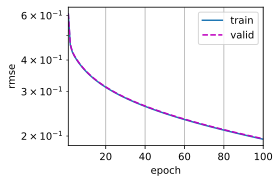

In [12]:
# %matplotlib inline
# import numpy as np
#import pandas as pd
# import torch
# from torch import nn
# from d2l import torch as d2l
train_data = pd.read_csv(d2l.download('kaggle_house_train'))
test_data = pd.read_csv(d2l.download('kaggle_house_test'))
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)
all_features = pd.get_dummies(all_features, dummy_na=True)
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(
    train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)
in_features = train_features.shape[1]
loss = nn.MSELoss()
def losslogtestfunc(net,features, labels):
    return loss(net(features), labels).item()
    
def init_weights(m):
    if type(m) == nn.Linear:
        m.reset_parameters()
class Net(nn.Module):
    def __init__(self, num_inputs=in_features, num_outputs=1):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.lin1 = nn.Linear(num_inputs,num_outputs)

    def forward(self, X):
        H1 = self.lin1(X.reshape((-1, self.num_inputs)))
        out = clipped_preds = torch.log(torch.clamp(H1, 1, float('inf')))
        return out
def get_net():
    net = nn.Sequential(nn.Linear(in_features,1))
    return net
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()

def train(net,l,train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size,testfunc=log_rmse):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        net.train()
        for X, y in train_iter:
            optimizer.zero_grad()
            ll = l(net(X),y)#loss(torch.log(torch.clamp(net(X), 1, float('inf'))),torch.log(y))#计算logy 和log\hat{y}
            ll.backward()
            optimizer.step()
        net.eval()
      
        train_ls.append(testfunc(net,train_features,train_labels))#(log_rmse(net, train_features, train_labels))
       
        if test_labels is not None:
                net.eval()
                test_ls.append(testfunc(net,test_features, test_labels))#(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid
def k_fold(l,net,k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size,show=1,testfunc=log_rmse):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net.apply(init_weights)
        train_ls, valid_ls = train(net,l, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size,testfunc=log_rmse)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if (i == 0)&(show==1):
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        if show==1:
            print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(loss,Net(),k, train_features,  torch.log(train_labels), num_epochs, lr,
                          weight_decay, batch_size,testfunc=losslogtestfunc)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

### 练习4.10.3

用平均值替换缺失值总是好主意吗？提示：能构造一个不随机丢失值的情况吗？

**解答：**

&emsp;&emsp;当缺失值太多且我们有用数据的均值和方差来标准化数据时会导致数据中有太多的零出现，从而可能的丢弃了缺失值过多特征的信息。我们可以对缺失的数据用前后值或者插值法填充。

折1，训练log rmse0.170255, 验证log rmse0.156591
折2，训练log rmse0.162190, 验证log rmse0.189010
折3，训练log rmse0.163678, 验证log rmse0.168293
折4，训练log rmse0.168316, 验证log rmse0.154744
折5，训练log rmse0.163567, 验证log rmse0.183720
5-折验证: 平均训练log rmse: 0.165601, 平均验证log rmse: 0.170472


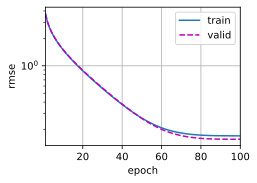

In [83]:
all_features2 = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
numeric_features2 = all_features2.dtypes[all_features2.dtypes != 'object'].index

all_features2[numeric_features2] = all_features[numeric_features2].apply(
     lambda x: (x - x.mean()) / (x.std()))
# # 在标准化数据之后，我们用插值法替换缺失值
all_features2[numeric_features2] = all_features2[numeric_features2].interpolate()
all_features2 = pd.get_dummies(all_features2, dummy_na=True)
n_train = train_data.shape[0]
train_features2 = torch.tensor(all_features2[:n_train].values, dtype=torch.float32)
test_features2 = torch.tensor(all_features2[n_train:].values, dtype=torch.float32)
train_labels2 = torch.tensor(train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)
loss = nn.MSELoss()
in_features2 = train_features2.shape[1]

k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(loss,get_net(),k, train_features2, train_labels2, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

### 练习4.10.4

通过$K$折交叉验证调整超参数，从而提高Kaggle的得分。

**解答：**

 &emsp;&emsp;取num_epochs, lr, batch_size,weight_decay  = 100, 15, 31,0 提交结果可以得到0.1504分值

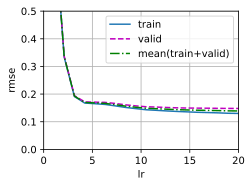

In [11]:
k, num_epochs, weight_decay, batch_size = 5, 100, 0, 64
animator_lr = d2l.Animator(xlabel='lr', ylabel='rmse', xlim=[0,20], ylim=[0.0, 0.2],
                        legend=[ 'train ', 'valid ','mean(train+valid)'])
for lr in np.linspace(0.,20,20):
    train_l, valid_l = k_fold(loss,get_net(),k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size,show=0)
    print(f'lr={float(lr):f}  {k}-折验证: 平均训练log rmse: {float(train_l):f}, '
            f'平均验证log rmse: {float(valid_l):f}')
    animator_lr.add(lr, (train_l, valid_l,0.5*(train_l+valid_l)))

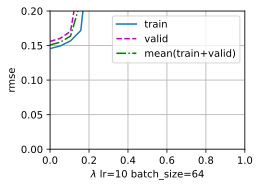

In [13]:
k, num_epochs, lr, batch_size = 5, 100, 10,  64
animator_wd = d2l.Animator(xlabel=f'$\lambda$ lr={lr} batch_size={batch_size}', ylabel='rmse', xlim=[0,1], ylim=[0.0, 0.2],
                        legend=[ 'train ', 'valid ','mean(train+valid)'])
for weight_decay in np.linspace(0.,1.,20):
    train_l, valid_l = k_fold(loss,get_net(),k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size,show=0)
    
    print(f'weight_decay={float(weight_decay):f}   {k}-折验证: 平均训练log rmse: {float(train_l):f}, '
            f'平均验证log rmse: {float(valid_l):f}')
    animator_wd.add(weight_decay, (train_l, valid_l,0.5*(train_l+valid_l)))

weight_decay_get:0,loss: 0.146857051551342


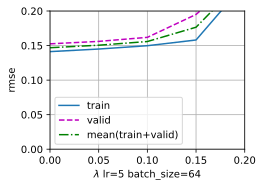

In [36]:
k, num_epochs, lr, batch_size = 5, 100, 15,  64 #为了使得 weight_decay起作用我们选一个较大的num_epochs
animator_wd = d2l.Animator(xlabel=f'$\lambda$ lr={lr} batch_size={batch_size}', ylabel='rmse', xlim=[0,0.2], ylim=[0.0, 0.2],
                        legend=[ 'train ', 'valid ','mean(train+valid)'])
findmin=lambda x1,x2,y1,y2: (x1,y1) if y2>=y1 else (x2,y2)
weight_decay_get=0
for weight_decay in np.linspace(0.,0.2,5):
    train_l, valid_l = k_fold(loss,get_net(),k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size,show=0)
    if weight_decay==0:
        l=0.5*(train_l+ valid_l)
    weight_decay_get,l=findmin( weight_decay_get,weight_decay,l,0.5*(train_l+ valid_l))
    print(f'weight_decay={float(weight_decay):f}  {k}-折验证: 平均训练log rmse: {float(train_l):f}, '
            f'平均验证log rmse: {float(valid_l):f}')
    animator_wd.add(weight_decay, (train_l, valid_l,0.5*(train_l+valid_l)))
print(f'weight_decay_get:{weight_decay_get},loss: {l}')

batch_get:31,loss: 0.1363726943731308


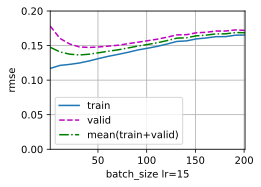

In [38]:
k, num_epochs, lr, weight_decay  = 5, 100,15,0
animator_batch_size = d2l.Animator(xlabel=f'batch_size lr={lr}', ylabel='rmse', xlim=[1,201], ylim=[0.0, 0.2],
                        legend=[ 'train ', 'valid ','mean(train+valid)'])
findmin=lambda x1,x2,y1,y2: (x1,y1) if y2>=y1 else (x2,y2)
batch_size_get=1
for batch_size in np.arange(1,202,10):
    train_l, valid_l = k_fold(loss,get_net(),k, train_features, train_labels, num_epochs, lr,
                          weight_decay,int(batch_size),show=0)
    if batch_size==1:
        l=0.5*(train_l+ valid_l)
    batch_size_get,l=findmin(batch_size_get,batch_size,l,0.5*(train_l+ valid_l))
    print(f'batch_size={batch_size}  {k}-折验证: 平均训练log rmse: {float(train_l):f}, '
            f'平均验证log rmse: {float(valid_l):f}')
    animator_batch_size.add(batch_size, (train_l, valid_l,0.5*(train_l+valid_l)))
print(f'batch_get:{batch_get},loss: {l}')

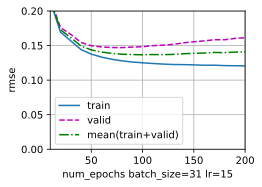

In [39]:
k, batch_size, lr, weight_decay  = 5, batch_size_get,15,0
animator_num_epochs = d2l.Animator(xlabel=f'num_epochs batch_size={batch_size} lr={lr}', ylabel='rmse', xlim=[10,200], ylim=[0.0, 0.2],
                        legend=[ 'train ', 'valid ','mean(train+valid)'])

for num_epochs in np.arange(10,210,10):
    train_l, valid_l = k_fold(loss,get_net(),k, train_features, train_labels, num_epochs, lr,
                          weight_decay,int(batch_size),show=0)
    print(f'num_epochs={num_epochs}  {k}-折验证: 平均训练log rmse: {float(train_l):f}, '
            f'平均验证log rmse: {float(valid_l):f}')
    animator_num_epochs.add(num_epochs, (train_l, valid_l,0.5*(train_l+valid_l)))


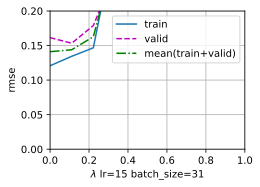

In [40]:
k, num_epochs, lr, batch_size = 5, 200, 15,  31
animator_wd = d2l.Animator(xlabel=f'$\lambda$ lr={lr} batch_size={batch_size}', ylabel='rmse', xlim=[0,1], ylim=[0.0, 0.2],
                        legend=[ 'train ', 'valid ','mean(train+valid)'])
for weight_decay in np.linspace(0.,1.,10):
    train_l, valid_l = k_fold(loss,get_net(),k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size,show=0)
    
    print(f'weight_decay={float(weight_decay):f}  {k}-折验证: 平均训练log rmse: {float(train_l):f}, '
            f'平均验证log rmse: {float(valid_l):f}')
    animator_wd.add(weight_decay, (train_l, valid_l,0.5*(train_l+valid_l)))

训练log rmse：0.125988


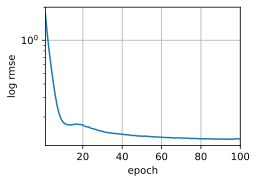

In [158]:
def train_and_pred(net,loss,train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size,name='submission.csv',f=lambda x: x.detach().numpy()):
    #net = get_net()
    train_ls, _ = train(net,loss,train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    net.eval()
    preds = f(net(test_features))
    # 将其重新格式化以导出到Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv(name, index=False)
num_epochs, lr, batch_size,weight_decay  = 100, 15, 31,0
train_and_pred(get_net(),loss,train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size,'../data/ch04-4-10-4-submission.csv')
#提交结果0.1504比原始好一些

### 练习4.10.5

通过改进模型（例如，层、权重衰减和dropout）来提高分数。

**解答：**

 &emsp;&emsp;构造一个3层的网络每层的隐藏单元数分别为165，82，41，并对最后两层分别取dropout为0.2，0.4，学习率为0.0001，训练轮次为100,batchsize为32的模型。提交计算的分数为0.14961。

折1，训练log rmse0.140500, 验证log rmse0.144793
折2，训练log rmse0.137242, 验证log rmse0.151161
折3，训练log rmse0.135362, 验证log rmse0.146083
折4，训练log rmse0.140950, 验证log rmse0.138989
折5，训练log rmse0.136554, 验证log rmse0.170211


(0.13812157809734343, 0.1502474546432495)

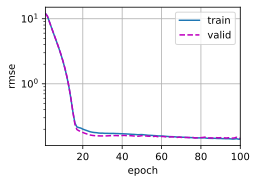

In [232]:
def mynet(num_hiddens,dropout1,dropout2):
    net= nn.Sequential(nn.Linear(in_features,in_features),
                       nn.ReLU(),
                       #nn.Dropout(dropout1),
                       nn.Linear(in_features, int(0.5*in_features)),
                       nn.ReLU(),
                       nn.Dropout(dropout1),
                       nn.Linear(int(0.5*in_features), int(0.5*0.5*in_features)),
                       nn.ReLU(),
                       nn.Dropout(dropout2),
                       nn.Linear(int(0.5*0.5*in_features), num_hiddens),
                       nn.Linear(num_hiddens, 1))
    return net
k, num_hiddens,weight_decay, batch_size,dropout1,dropout2,num_epochs,lr= 5,int(0.5*0.5*0.5*in_features),0, 32,0.2,0.4,100,0.0001
k_fold(loss,mynet(int(num_hiddens),dropout1,dropout2),k, train_features,  train_labels, num_epochs, lr,
                          weight_decay, batch_size,show=1)


训练log rmse：0.134513


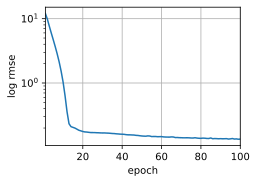

In [233]:
k, num_hiddens,weight_decay, batch_size,dropout1,dropout2,num_epochs,lr= 5,int(0.5*0.5*0.5*in_features),0, 32,0.2,0.4,100,0.0001

train_and_pred(mynet(int(num_hiddens),dropout1,dropout2),loss,train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size,name='../data/ch04-4-10-5-submission.csv')
#得分0.14961

### 练习4.10.6

如果我们没有像本节所做的那样标准化连续的数值特征，会发生什么？

**解答：**

 &emsp;&emsp;会导致计算时候，模型对数值比较大的特征和数值比较小的特征关注度不一致，无法公平对待每一个特征，同时也可能导致数值不稳定无法训练。

折1，训练log rmse0.159491, 验证log rmse0.163415
折2，训练log rmse0.163380, 验证log rmse0.176823
折3，训练log rmse0.421263, 验证log rmse0.407348
折4，训练log rmse0.161419, 验证log rmse0.158913
折5，训练log rmse0.194534, 验证log rmse0.224197
5-折验证: 平均训练log rmse: 0.220017, 平均验证log rmse: 0.226139


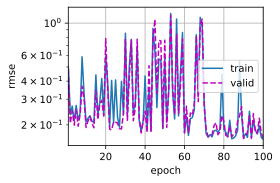

In [105]:
all_features3 = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
numeric_features3 = all_features3.dtypes[all_features3.dtypes != 'object'].index

all_features3[numeric_features3] = all_features3[numeric_features3].fillna(all_features3[numeric_features3].mean())
all_features3 = pd.get_dummies(all_features3, dummy_na=True)
n_train = train_data.shape[0]
train_features3 = torch.tensor(all_features3[:n_train].values, dtype=torch.float32)
test_features3 = torch.tensor(all_features3[n_train:].values, dtype=torch.float32)
train_labels3 = torch.tensor(train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)
loss = nn.MSELoss()
in_features3 = train_features3.shape[1]
def get_net():
    net= nn.Sequential(nn.Linear(in_features,1))
    return net
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(loss,k, train_features3, train_labels3, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')